In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_excel(r"1730285881-Airbnb_Open_Data.xlsx")

df.shape, df.columns


((102599, 26),
 Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
        'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
        'country code', 'instant_bookable', 'cancellation_policy', 'room type',
        'Construction year', 'price', 'service fee', 'minimum nights',
        'number of reviews', 'last review', 'reviews per month',
        'review rate number', 'calculated host listings count',
        'availability 365', 'house_rules', 'license'],
       dtype='object'))

In [2]:

df_clean = df.copy()
df_clean = df_clean.drop_duplicates()
df_clean = df_clean.dropna(subset=["price", "room type", "neighbourhood group"])

# Remove unrealistic prices
df_clean = df_clean[(df_clean["price"] > 0) & (df_clean["price"] < 1000)]

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 83976 entries, 0 to 102056
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83976 non-null  int64         
 1   NAME                            83761 non-null  object        
 2   host id                         83976 non-null  int64         
 3   host_identity_verified          83749 non-null  object        
 4   host name                       83645 non-null  object        
 5   neighbourhood group             83976 non-null  object        
 6   neighbourhood                   83963 non-null  object        
 7   lat                             83969 non-null  float64       
 8   long                            83969 non-null  float64       
 9   country                         83526 non-null  object        
 10  country code                    83870 non-null  object        
 11  instan

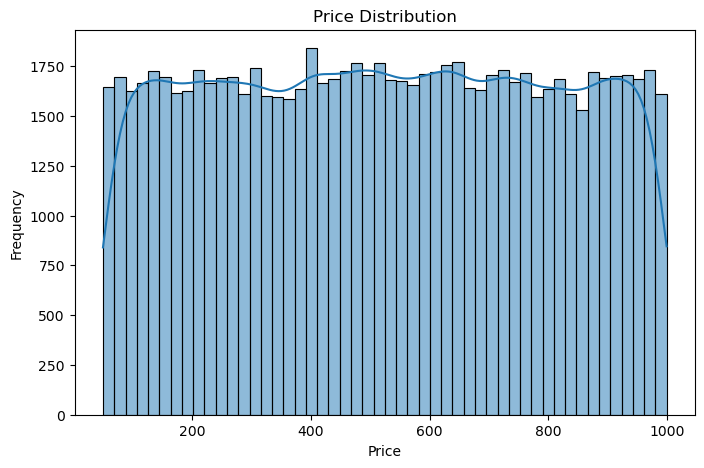

In [3]:

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df_clean["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


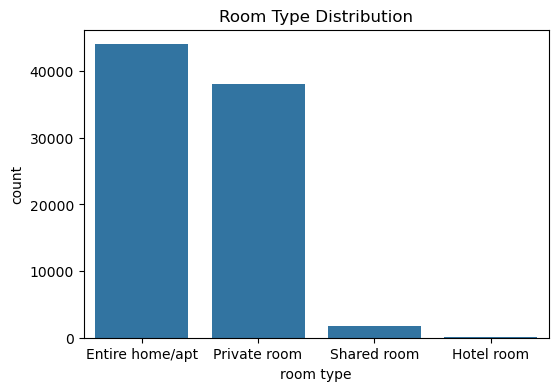

In [4]:

# Room type distribution
plt.figure(figsize=(6,4))
sns.countplot(x="room type", data=df_clean, order=df_clean["room type"].value_counts().index)
plt.title("Room Type Distribution")
plt.show()


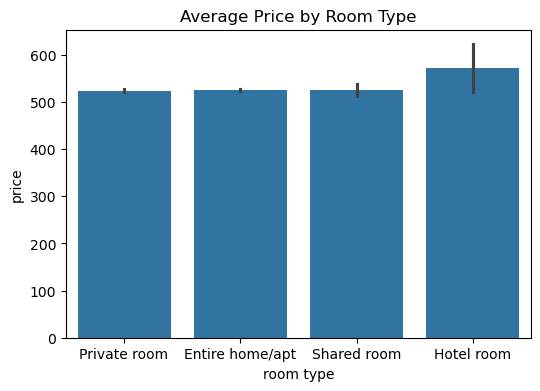

In [5]:

# Average price by room type
plt.figure(figsize=(6,4))
sns.barplot(x="room type", y="price", data=df_clean)
plt.title("Average Price by Room Type")
plt.show()


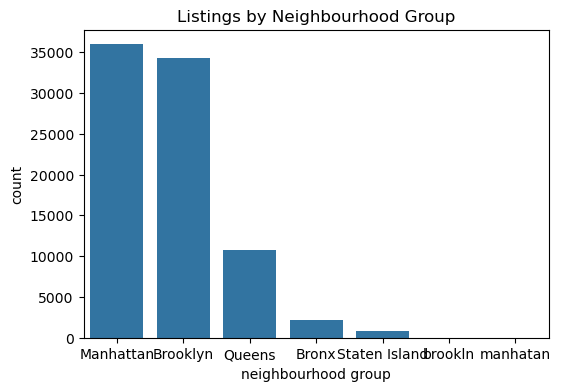

In [6]:

# Listings by neighbourhood group
plt.figure(figsize=(6,4))
sns.countplot(x="neighbourhood group", data=df_clean, order=df_clean["neighbourhood group"].value_counts().index)
plt.title("Listings by Neighbourhood Group")
plt.show()


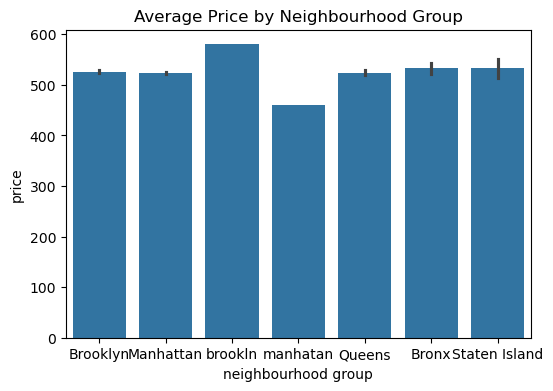

In [7]:

# Average price by neighbourhood group
plt.figure(figsize=(6,4))
sns.barplot(x="neighbourhood group", y="price", data=df_clean)
plt.title("Average Price by Neighbourhood Group")
plt.show()


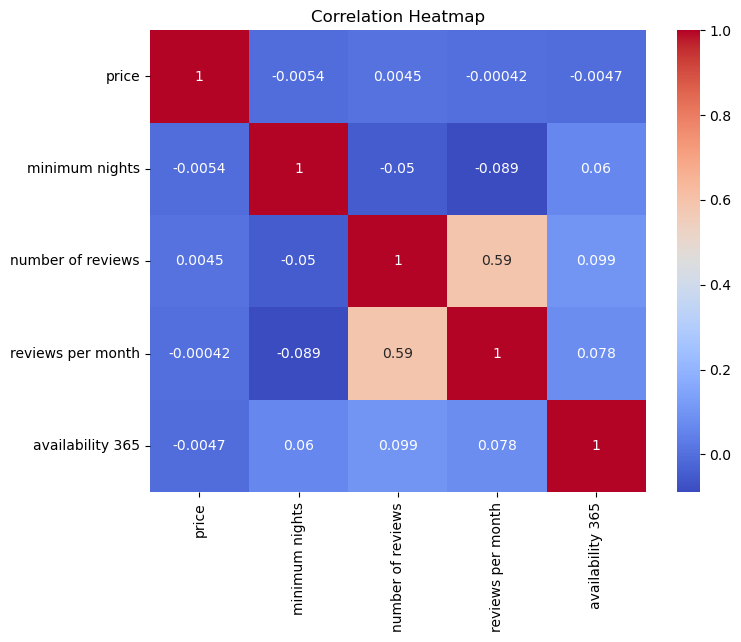

In [8]:

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[["price","minimum nights","number of reviews","reviews per month","availability 365"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
